# Modeling

First thing, I want to see what the simplest, baseline model for my data is. To do this, I will just find whatever I have that correlates the most with PRICE and then create a model with it.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import functions

In [12]:
# Import data
kc = pd.read_csv('../../Data/matthew_clean_data.csv', index_col=0)

In [13]:
# Create Correlation matrix
kc_matrix = kc.corr()
kc_matrix['price']

id             -0.016772
price           1.000000
grade           0.667951
yr_built        0.053953
yr_renovated    0.125499
floors_1.5      0.015896
floors_2.0      0.232696
floors_2.5      0.122845
floors_3.0      0.020036
floors_3.5      0.018132
Name: price, dtype: float64

In [14]:
#kc[kc['price'] < 500000].info()
#pd.set_option('display.float_format', '{:.2f}'.format)
#kc['price'].quantile(0.8)
kc_nooutliers = kc[kc['price'] < 300000]
kc_nooutliers = kc.corr()
kc_nooutliers

,id,price,grade,yr_built,yr_renovated,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
id,1.000000,-0.016772,0.008188,0.021617,0.006138,-0.003326,0.026607,-0.000073,-0.005871,-0.010054
price,-0.016772,1.000000,0.667951,0.053953,0.125499,0.015896,0.232696,0.122845,0.020036,0.018132
grade,0.008188,0.667951,1.000000,0.447865,0.242323,-0.123523,0.470088,0.091342,0.073558,0.014021
yr_built,0.021617,0.053953,0.447865,1.000000,0.249276,-0.380590,0.526998,-0.028586,0.196654,0.012085
yr_renovated,0.006138,0.125499,0.242323,0.249276,1.000000,-0.002416,0.047781,0.026664,0.004597,NaN
floors_1.5,-0.003326,0.015896,-0.123523,-0.380590,-0.002416,1.000000,-0.244525,-0.026994,-0.053147,-0.005609
floors_2.0,0.026607,0.232696,0.470088,0.526998,0.047781,-0.244525,1.000000,-0.068036,-0.133953,-0.014136
floors_2.5,-0.000073,0.122845,0.091342,-0.028586,0.026664,-0.026994,-0.068036,1.000000,-0.014788,-0.001560
floors_3.0,-0.005871,0.020036,0.073558,0.196654,0.004597,-0.053147,-0.133953,-0.014788,1.000000,-0.003072
floors_3.5,-0.010054,0.018132,0.014021,0.012085,NaN,-0.005609,-0.014136,-0.001560,-0.003072,1.000000


In [15]:
# Grade seems to have the highest correlation here. Let's start there

#Train/Test Split
X = kc.drop(columns=['price', 'date', 'yr_renovated'])
y = kc['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

# Model
#f = 'price ~ grade'

#model = ols(formula=f, data=df).fit()
model = sm.OLS(y_train, sm.add_constant(X_train['grade'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:23:27   Log-Likelihood:            -2.0172e+05
No. Observations:               14469   AIC:                         4.035e+05
Df Residuals:                   14467   BIC:                         4.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.469e+05   9375.389    -47.665      0.000   -4.65e+05   -4.28e+05
grade       2.121e+05   1951.391    108.702      0.000    2.08e+05    2.16e+05
==============================================================================
Omnibus:                    12952.578   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1180521.734
Skew:                           3.927   Prob(JB):                         0.00
Kurtosis:                      46.549   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
train_preds = model.predict(sm.add_constant(X_train['grade']))
test_preds = model.predict(sm.add_constant(X_test['grade']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.4496
Test R2: 0.4386
****
Train RMSE: $274,547.67
Test RMSE: $271,099.80
****
Train MAE: $176,478.92
Test MAE: $175,154.76


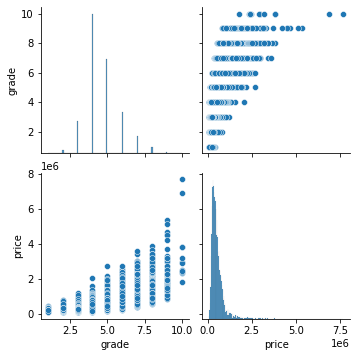

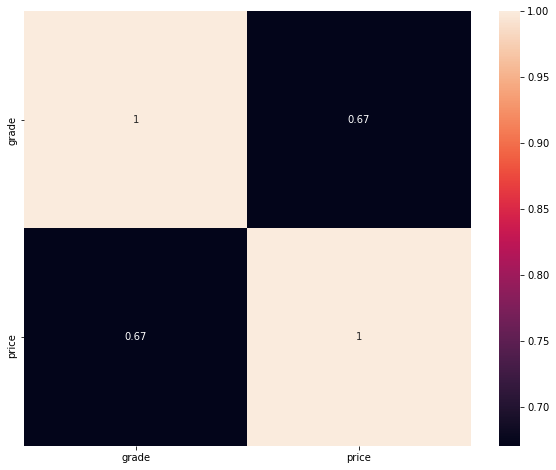

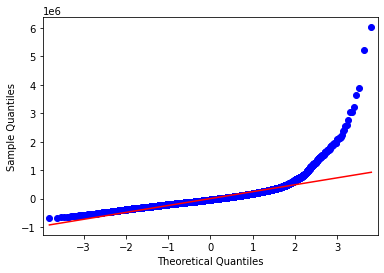

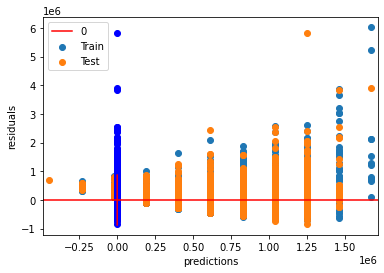

In [18]:
functions.check_assumptions(X_train['grade'], y_train, train_preds, test_preds, y_test)

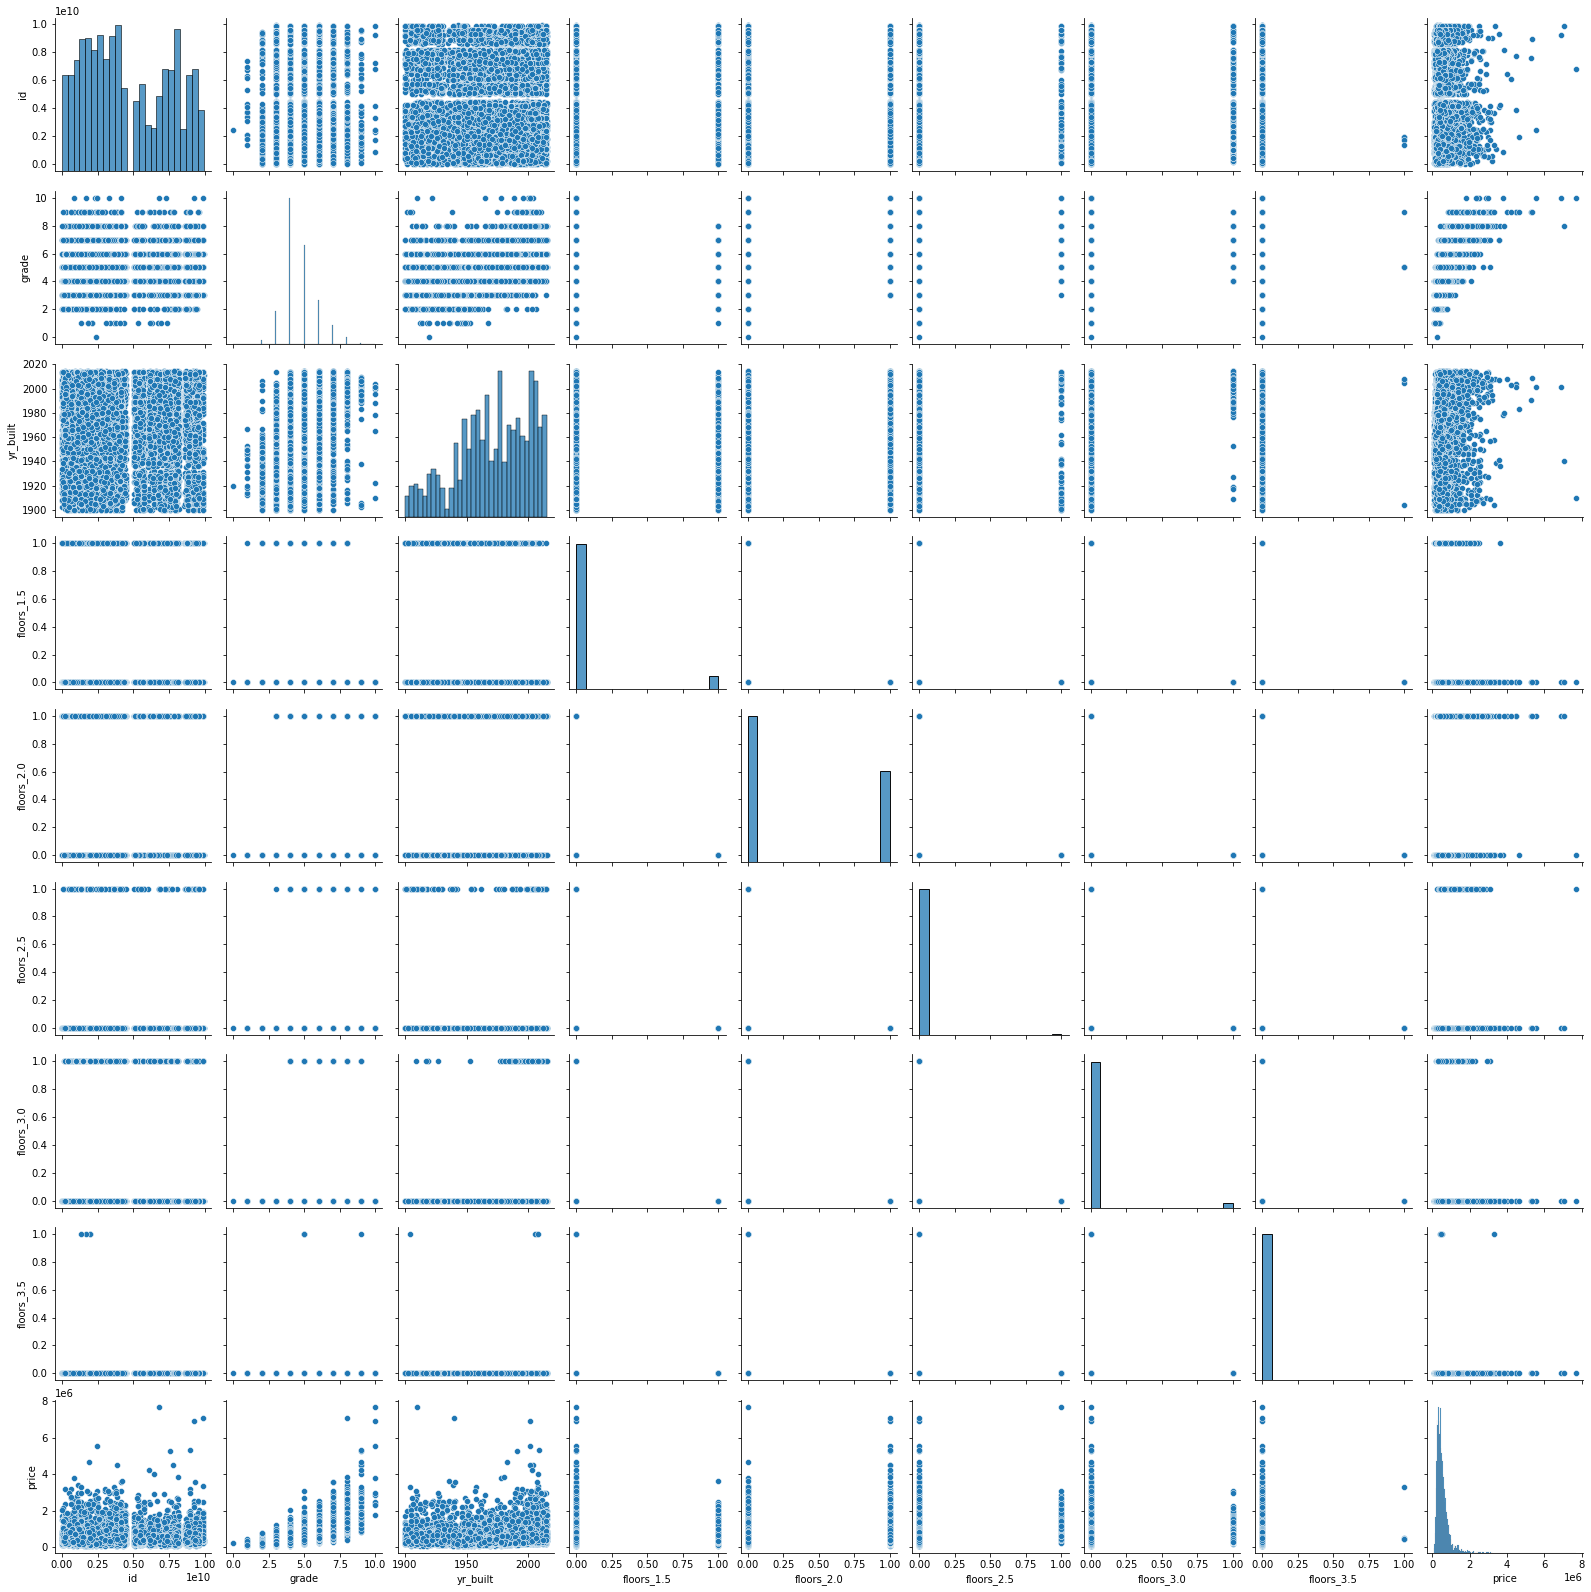

In [131]:
# Check Linearity
train_df = pd.concat([X_train, y_train], axis=1)
train_df.corr().price.sort_values(ascending=False)
sns.pairplot(train_df)
plt.show()

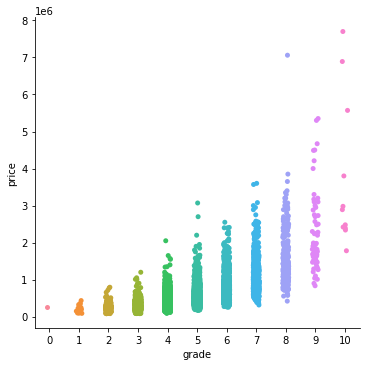

In [132]:
sns.catplot(x='grade', y='price', data=train_df)

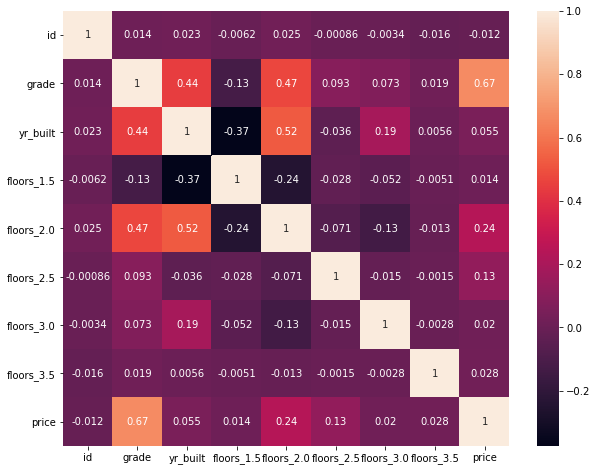

In [133]:
# Check Multicollinearity
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True,)
plt.show()

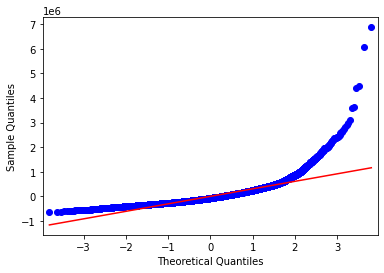

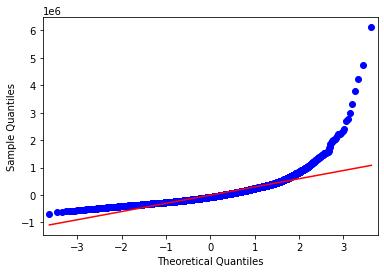

In [91]:
# Check for residual normality
train_residuals = y_train - train_preds
sm.qqplot(train_residuals, line = 'r');
test_residuals = y_test - test_preds
sm.qqplot(test_residuals, line = 'r');

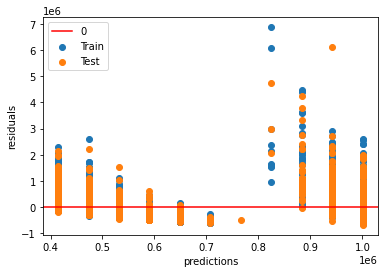

In [100]:
#Checking HeteroSkedacity

# note that these residplots only work for single variables
sns.residplot(x=X_train['grade'], y=y_train)